In [134]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

Read the csv file from given URL

In [135]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [136]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
titanic.set_index('PassengerId', drop = True, inplace = True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
del titanic['Name']

In [139]:
titanic.head()
titanic.describe()
del titanic['Ticket']

In [140]:
titanic.head()
titanic['Embarked'].dropna(inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [141]:
del titanic['Cabin']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [143]:
del titanic['Embarked']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,gender
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,1
2,1,1,female,38.0,1,0,71.2833,2
3,1,3,female,26.0,0,0,7.9250,2
4,1,1,female,35.0,1,0,53.1000,2
5,0,3,male,35.0,0,0,8.0500,1


In [144]:
#numerical value for Sex in the column gender
def gender(st):
    if st == 'male':
        return 1
    else:
        return 2
titanic['gender'] = titanic.Sex.apply(gender)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,gender
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,1
2,1,1,female,38.0,1,0,71.2833,2
3,1,3,female,26.0,0,0,7.9250,2
4,1,1,female,35.0,1,0,53.1000,2
5,0,3,male,35.0,0,0,8.0500,1


In [145]:
del titanic['Sex']

In [146]:
class_1_surv = titanic[(titanic['Pclass'] == 1)].mean()['Survived']
class_2_surv = titanic[(titanic['Pclass'] == 2)].mean()['Survived']
class_3_surv = titanic[(titanic['Pclass'] == 3)].mean()['Survived']
class_1_surv

0.6296296296296297

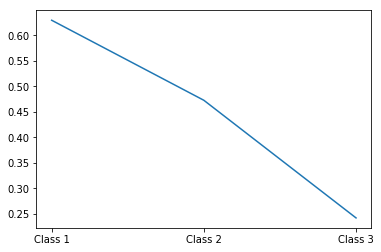

In [147]:
#graph based on class survival
my_xticks = ['Class 1','Class 2','Class 3']
x = [1,2,3]
plt.xticks(x, my_xticks)
plt.plot(x, [class_1_surv, class_2_surv, class_3_surv])
plt.show()

In [148]:
males = len(titanic[titanic['gender'] == 1])
females = len(titanic[titanic['gender'] == 2])

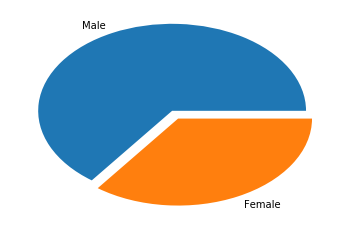

In [151]:
# male v/s female pie chart
plt.pie([males,females],
       labels = ['Male', 'Female'],
       explode = [0.10, 0],
       startangle = 0)
plt.show()

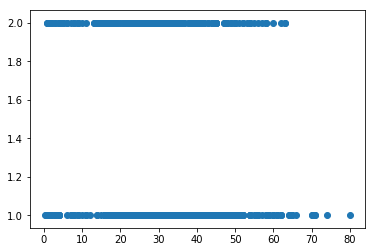

In [153]:
#scatter graph based on age and gender
plt.scatter(titanic['Age'], titanic['gender'])
plt.show()

In [154]:
survived = titanic[titanic['Survived'] == 1]
surv_avg = survived.mean()['Age']
not_survived = titanic[titanic['Survived'] == 0]
nsurv_avg = not_survived.mean()['Age']

In [155]:
def fillavg(survv):
    if survv == 1:
        return surv_avg
    else:
        return nsurv_avg

In [156]:
titanic['avg'] = titanic.Survived.apply(fillavg)

In [157]:
titanic.Age.fillna(titanic['avg'], inplace = True)
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,avg
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.750072,0.523008,0.381594,32.204208,1.352413,29.750072
std,0.486592,0.836071,13.010682,1.102743,0.806057,49.693429,0.477990,1.110642
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,28.343690
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,28.343690
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.000000,30.626179
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,30.626179
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,30.626179


In [158]:
del titanic['avg']

In [159]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,1
2,1,1,38.0,1,0,71.2833,2
3,1,3,26.0,0,0,7.9250,2
4,1,1,35.0,1,0,53.1000,2
5,0,3,35.0,0,0,8.0500,1


In [160]:
x_train,x_test,y_train,y_test = train_test_split(titanic.drop('Survived',axis = 1),titanic['Survived'],test_size = 0.30,random_state = 101)

In [161]:
#Decision Tree
clf1 = tree.DecisionTreeClassifier()
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)

0.7985074626865671